<a href="https://colab.research.google.com/github/Mahdi-Kriaa/faulty_water_pumps_predicton/blob/main/faulty_water_pumps_predicton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2 - Part 1

**1. Source of data**

The data for this project comes from the Taarifa waterpoints dashboard, which aggregates data from the Tanzania Ministry of Water.

Link to dataset : https://www.kaggle.com/datasets/sumeetsawant/pump-it-up-challenge-driven-data?select=training_Set_values.csv

**2. Data description**

The dataset provides detailed insights into various aspects of water pumps. It includes critical information such as the geographical coordinates of the pumps, the management type of pumps, the source of water, and the quality and quantity of water that each pump can extract. Moreover, it provides the operational status of each pump, indicating whether it is functional, non-functional, or requires repair. It also includes data about the population each pump serves, offering valuable insights into the scale of its impact.


**3. What is the target?**

The target is the status_group variable, which indicates whether the pump is functional, non-functional, or functional but needs repair.

**4. What does one row represent?**

A row represent a record in a set of conditions

**5. Is this a classification or regression problem?**

Classification problem

**6. How many features does the data have?**

40 features (at least, 7 features will be removed because they dont represent a useful information like "id" or they are almost represented by other features like "extraction_type_class" and "extraction_type_group")

**7. How many rows are in the dataset?**

59400 rows

**8. What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?**

- Dealing with missing values
- Dealing with imbalanced classes

# Project 2 - Part 2

## EDA and Data Preprocessing

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [112]:
file_id_features = "1QrNFlZxrLb2vl0zY96LXgNJctH6zprdr"
file_id_target = "1DKPsAit8BHV3TQp1l8tDH6pVMxTTM6O1"
df_features = pd.read_csv(f"https://docs.google.com/uc?id={file_id_features}")
df_target = pd.read_csv(f"https://docs.google.com/uc?id={file_id_target}")

In [113]:
pd.set_option('display.max_columns', None)

In [114]:
print(df_features.shape)
df_features.head(20)

(59400, 40)


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
5,9944,20.0,2011-03-13,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Tajiri,0,Pangani,Moa/Mwereme,Tanga,4,8,Mkinga,Moa,1,True,GeoData Consultants Ltd,VWC,Zingibali,True,2009,submersible,submersible,submersible,vwc,user-group,pay per bucket,per bucket,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe
6,19816,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365,Kwa Ngomho,0,Internal,Ishinabulandi,Shinyanga,17,3,Shinyanga Rural,Samuye,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,swn 80,swn 80,handpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
7,54551,0.0,2012-10-09,Rwssp,0,DWE,32.620617,-4.226198,Tushirikiane,0,Lake Tanganyika,Nyawishi Center,Shinyanga,17,3,Kahama,Chambo,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,nira/tanira,nira/tanira,handpump,wug,user-group,unknown,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
8,53934,0.0,2012-11-03,Wateraid,0,Water Aid,32.711100,-5.146712,Kwa Ramadhan Musa,0,Lake Tanganyika,Imalauduki,Tabora,14,6,Tabora Urban,Itetemia,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,india mark ii,india mark ii,handpump,vwc,user-group,never pay,never pay,salty,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump
9,46144,0.0,2011-08-03,Isingiro Ho,0,Artisan,30.626991,-1.257051,Kwapeto,0,Lake Victoria,Mkonomre,Kagera,18,1,Karagwe,Kaisho,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump


In [115]:
df_features.dtypes

id                         int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_ty

In [116]:
print(df_target.shape)
df_target.head()

(59400, 2)


,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [117]:
df_pumps = df_features.merge(df_target,on="id")

In [118]:
# cardinal of categorical features
df_pumps["num_private"] = df_pumps["num_private"].astype("object")
cat_cols = df_pumps.select_dtypes("object").columns.delete(0)
for e in cat_cols :
  print(f"{e}: {len(df_pumps[e].unique())}")

funder: 1898
installer: 2146
wpt_name: 37400
num_private: 65
basin: 9
subvillage: 19288
region: 21
lga: 125
ward: 2092
public_meeting: 3
recorded_by: 1
scheme_management: 13
scheme_name: 2697
permit: 3
extraction_type: 18
extraction_type_group: 13
extraction_type_class: 7
management: 12
management_group: 5
payment: 7
payment_type: 7
water_quality: 8
quality_group: 6
quantity: 5
quantity_group: 5
source: 10
source_type: 7
source_class: 3
waterpoint_type: 7
waterpoint_type_group: 6
status_group: 3


In [119]:
high_cardinal_classes = ["funder","installer","wpt_name","ward","subvillage","scheme_name"]
for c in high_cardinal_classes:
    print("***",c,"***")
    display(df_pumps[c].value_counts().head(20))

*** funder ***


Government Of Tanzania    9084
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
Kkkt                      1287
World Vision              1246
Unicef                    1057
Tasaf                      877
District Council           843
Dhv                        829
Private Individual         826
Dwsp                       811
0                          777
Norad                      765
Germany Republi            610
Tcrs                       602
Ministry Of Water          590
Water                      583
Dwe                        484
Name: funder, dtype: int64

*** installer ***


DWE                   17402
Government             1825
RWE                    1206
Commu                  1060
DANIDA                 1050
KKKT                    898
Hesawa                  840
0                       777
TCRS                    707
Central government      622
CES                     610
Community               553
DANID                   552
District Council        551
HESAWA                  539
LGA                     408
World vision            408
WEDECO                  397
TASAF                   396
District council        392
Name: installer, dtype: int64

*** wpt_name ***


none               3563
Shuleni            1748
Zahanati            830
Msikitini           535
Kanisani            323
Bombani             271
Sokoni              260
Ofisini             254
School              208
Shule Ya Msingi     199
Shule               152
Sekondari           146
Muungano            133
Mkombozi            111
Madukani            104
Mbugani              94
Hospital             94
Upendo               93
Kituo Cha Afya       90
Mkuyuni              88
Name: wpt_name, dtype: int64

*** ward ***


Igosi            307
Imalinyi         252
Siha Kati        232
Mdandu           231
Nduruma          217
Mishamo          203
Kitunda          203
Msindo           201
Chalinze         196
Maji ya Chai     190
Usuka            187
Ngarenanyuki     172
Chanika          171
Vikindu          162
Mtwango          153
Matola           145
Zinga/Ikerege    141
Wanging'ombe     139
Maramba          139
Itete            137
Name: ward, dtype: int64

*** subvillage ***


Madukani      508
Shuleni       506
Majengo       502
Kati          373
Mtakuja       262
Sokoni        232
M             187
Muungano      172
Mbuyuni       164
Mlimani       152
Songambele    147
Msikitini     134
Miembeni      134
1             132
Kibaoni       114
Kanisani      111
I             109
Mapinduzi     109
Mjimwema      108
Mjini         108
Name: subvillage, dtype: int64

*** scheme_name ***


K                                        682
None                                     644
Borehole                                 546
Chalinze wate                            405
M                                        400
DANIDA                                   379
Government                               320
Ngana water supplied scheme              270
wanging'ombe water supply s              261
wanging'ombe supply scheme               234
I                                        229
Bagamoyo wate                            229
Uroki-Bomang'ombe water sup              209
N                                        204
Kirua kahe gravity water supply trust    193
Machumba estate pipe line                185
Makwale water supplied sche              166
Kijiji                                   161
S                                        154
Losaa-Kia water supply                   152
Name: scheme_name, dtype: int64

The majority of each these features classes have few samples, so these features are useless

In [120]:
# drop useless features
df_pumps.drop(columns=high_cardinal_classes,inplace=True)

In [121]:
# check identical values in two columns
def   check_identical_columns(data,c1,c2,include_na=False) :
          data.reset_index(drop=True,inplace=True)
          n = data.shape[0]
          j = 0
          for i in range(n):
            if data.loc[i,c1] == data.loc[i,c2] :
                j += 1
            if include_na :
                if np.isnan(data.loc[i,c1]) | np.isnan(data.loc[i,c2]) :
                  j += 1
          return j/n

In [122]:
# check columns that seem to present same information
print("extraction_type / extraction_type_group :",check_identical_columns(df_pumps,"extraction_type","extraction_type_group"))
print("extraction_type / extraction_type_class :",check_identical_columns(df_pumps,"extraction_type","extraction_type_class"))
print("payment / payment_type :",check_identical_columns(df_pumps,"payment","payment_type"))
print("water_quality / quality_group :",check_identical_columns(df_pumps,"water_quality","quality_group"))
print("quantity / quantity_group :",check_identical_columns(df_pumps,"quantity","quantity_group"))
print("source / source_type :",check_identical_columns(df_pumps,"source","source_type"))
print("waterpoint_type / waterpoint_type_group :",check_identical_columns(df_pumps,"waterpoint_type","waterpoint_type_group"))

extraction_type / extraction_type_group : 0.9584343434343434
extraction_type / extraction_type_class : 0.6392929292929292
payment / payment_type : 0.5818013468013468
water_quality / quality_group : 0.13023569023569023
quantity / quantity_group : 1.0
source / source_type : 0.623030303030303
waterpoint_type / waterpoint_type_group : 0.8972558922558923


Except the "water_quality / quality_group" pair, columns in each these pairs represent almost the same information so we can drop one of theme.

In [150]:
# drop useless features
df_pumps.drop(columns=["id","recorded_by","extraction_type_group","extraction_type_class","payment_type","quantity_group","source_type","waterpoint_type_group"],inplace=True)

KeyError: ignored

<Axes: xlabel='quality_group', ylabel='water_quality'>

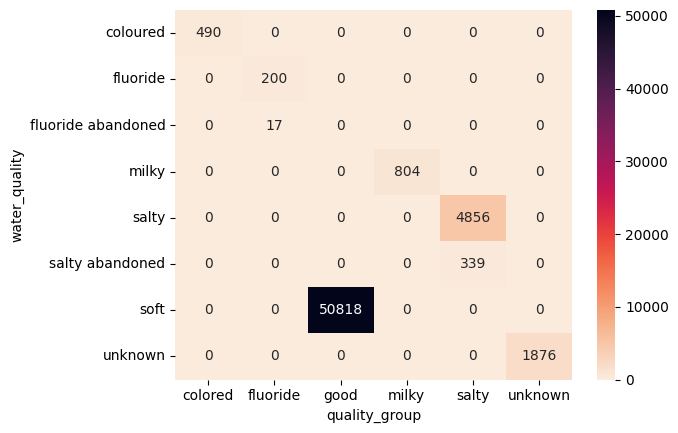

In [124]:
# disply contingency matrix for "water_quality" and "quality_group" features
contingency_table = pd.crosstab(df_pumps['water_quality'],df_pumps['quality_group'])
sns.heatmap(contingency_table, annot=True, fmt='d', cmap="rocket_r")

these two features represent almost the same information so we can drop the "quality group" column (it provide slightly less detailed information)

In [125]:
# drop "quality_group" feature
df_pumps.drop(columns="quality_group",inplace=True)

<Axes: xlabel='region_code', ylabel='region'>

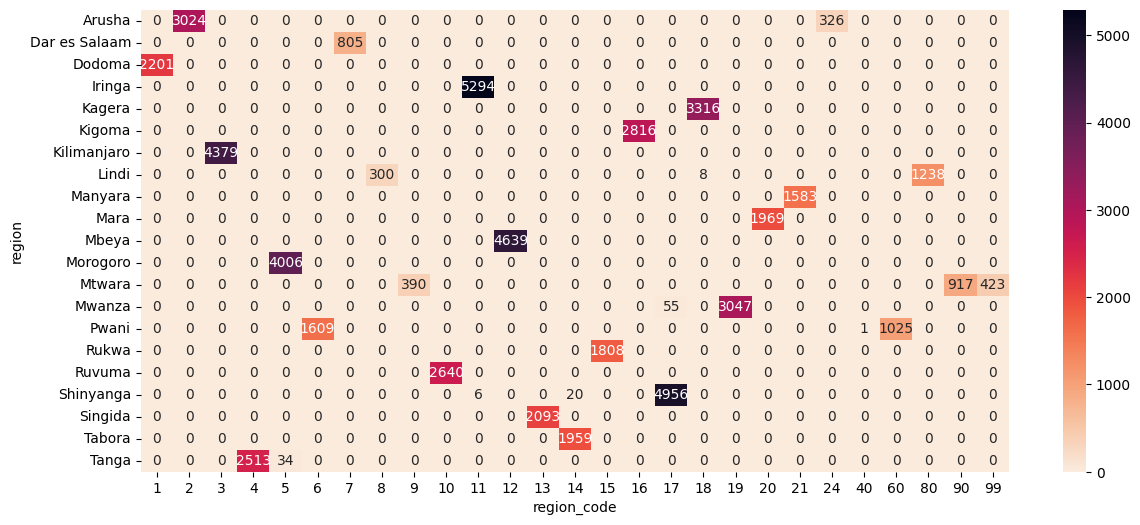

In [126]:
# display contingency matrix for "region" and "region_code" features to verify inconsistencies
plt.figure(figsize=(14,6))
contingency_table = pd.crosstab(df_pumps['region'],df_pumps['region_code'])
sns.heatmap(contingency_table, annot=True, fmt='d', cmap="rocket_r")

Some regions have more than one code, so the "region_code" feature will be dropped as we already have the "region" feature.

<Axes: xlabel='district_code', ylabel='lga'>

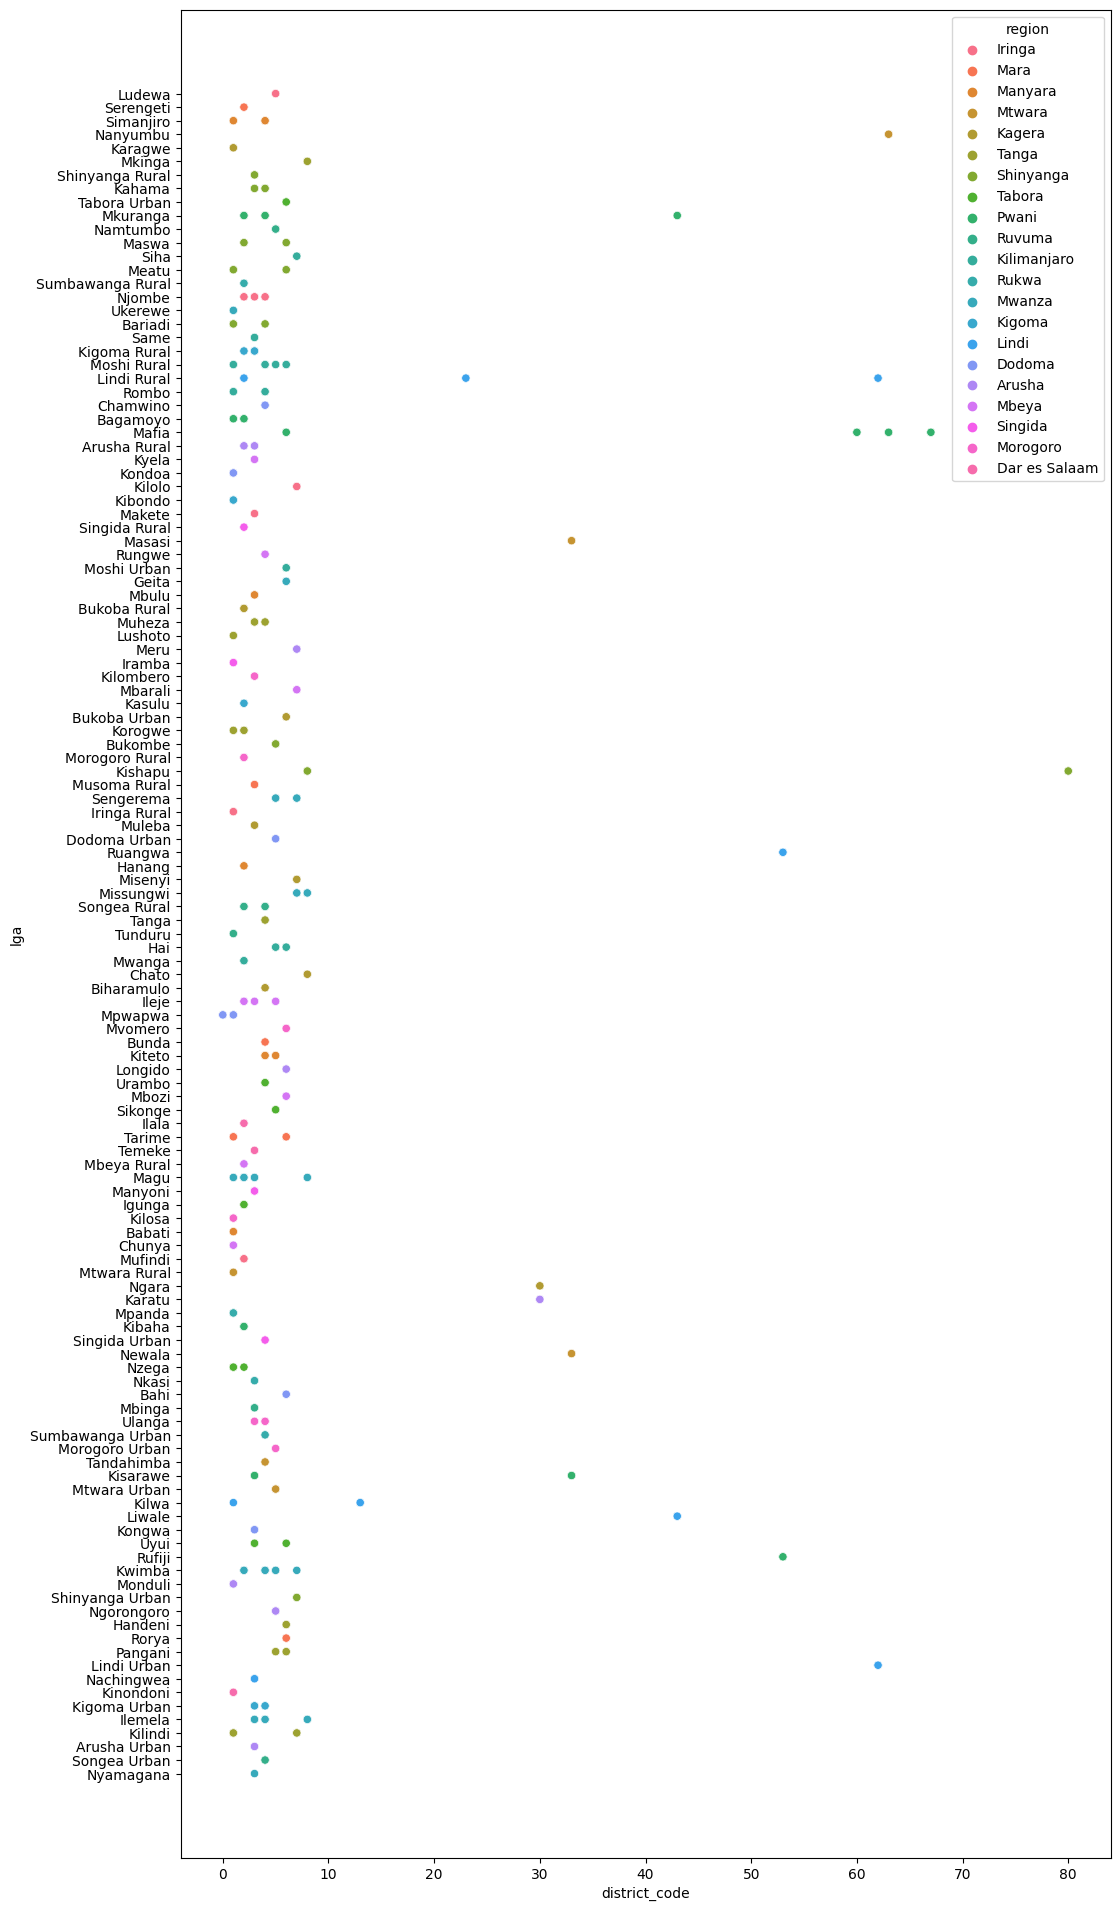

In [127]:
# disply scatter for "district_code" and "lga" features (lga represent the district name) to verify inconsistencies
plt.figure(figsize=(12,24))
sns.scatterplot(data=df_pumps,x="district_code",y="lga",hue="region")

Some districts have more than one code, so they will be dropped as we already have the district name (lga)

In [128]:
# drop useless features
df_pumps.drop(columns=["region_code","district_code"],inplace=True)

In [129]:
# drop duplicate rows
df_pumps.drop_duplicates(inplace=True)
df_pumps.shape

(59400, 26)

In [144]:
# display classes to verify inconsistencies
cat_cols = df_pumps.select_dtypes("object").columns.delete(0)
for c in cat_cols :
  print(f"* {c}: {df_pumps[c].unique()}")

* basin: ['Lake Nyasa' 'Lake Victoria' 'Pangani' 'Ruvuma / Southern Coast'
 'Internal' 'Lake Tanganyika' 'Wami / Ruvu' 'Rufiji' 'Lake Rukwa']
* region: ['Iringa' 'Mara' 'Manyara' 'Mtwara' 'Kagera' 'Tanga' 'Shinyanga' 'Tabora'
 'Pwani' 'Ruvuma' 'Kilimanjaro' 'Rukwa' 'Mwanza' 'Kigoma' 'Lindi' 'Dodoma'
 'Arusha' 'Mbeya' 'Singida' 'Morogoro' 'Dar es Salaam']
* lga: ['Ludewa' 'Serengeti' 'Simanjiro' 'Nanyumbu' 'Karagwe' 'Mkinga'
 'Shinyanga Rural' 'Kahama' 'Tabora Urban' 'Mkuranga' 'Namtumbo' 'Maswa'
 'Siha' 'Meatu' 'Sumbawanga Rural' 'Njombe' 'Ukerewe' 'Bariadi' 'Same'
 'Kigoma Rural' 'Moshi Rural' 'Lindi Rural' 'Rombo' 'Chamwino' 'Bagamoyo'
 'Mafia' 'Arusha Rural' 'Kyela' 'Kondoa' 'Kilolo' 'Kibondo' 'Makete'
 'Singida Rural' 'Masasi' 'Rungwe' 'Moshi Urban' 'Geita' 'Mbulu'
 'Bukoba Rural' 'Muheza' 'Lushoto' 'Meru' 'Iramba' 'Kilombero' 'Mbarali'
 'Kasulu' 'Bukoba Urban' 'Korogwe' 'Bukombe' 'Morogoro Rural' 'Kishapu'
 'Musoma Rural' 'Sengerema' 'Iringa Rural' 'Muleba' 'Dodoma Urban'
 'Ruangw

In [131]:
# replace missing values that are not in nan format by nan
df_pumps.replace(["unknown","None"],np.nan,inplace=True)

In [132]:
df_pumps["num_private"] = df_pumps["num_private"].apply(lambda x : 0 if  x == 0 else 1)

In [133]:
# display normalized number of missing values
(df_pumps.isna().sum())/df_pumps.shape[0]

id                   0.000000
amount_tsh           0.000000
date_recorded        0.000000
gps_height           0.000000
longitude            0.000000
latitude             0.000000
num_private          0.000000
basin                0.000000
region               0.000000
lga                  0.000000
population           0.000000
public_meeting       0.056128
recorded_by          0.000000
scheme_management    0.065286
permit               0.051448
construction_year    0.000000
extraction_type      0.000000
management           0.009444
management_group     0.009444
payment              0.137323
water_quality        0.031582
quantity             0.013283
source               0.001111
source_class         0.004680
waterpoint_type      0.000000
status_group         0.000000
dtype: float64

In [134]:
int_cols = df_pumps.select_dtypes("int").columns
df_pumps[int_cols] = df_pumps[int_cols].astype("float")

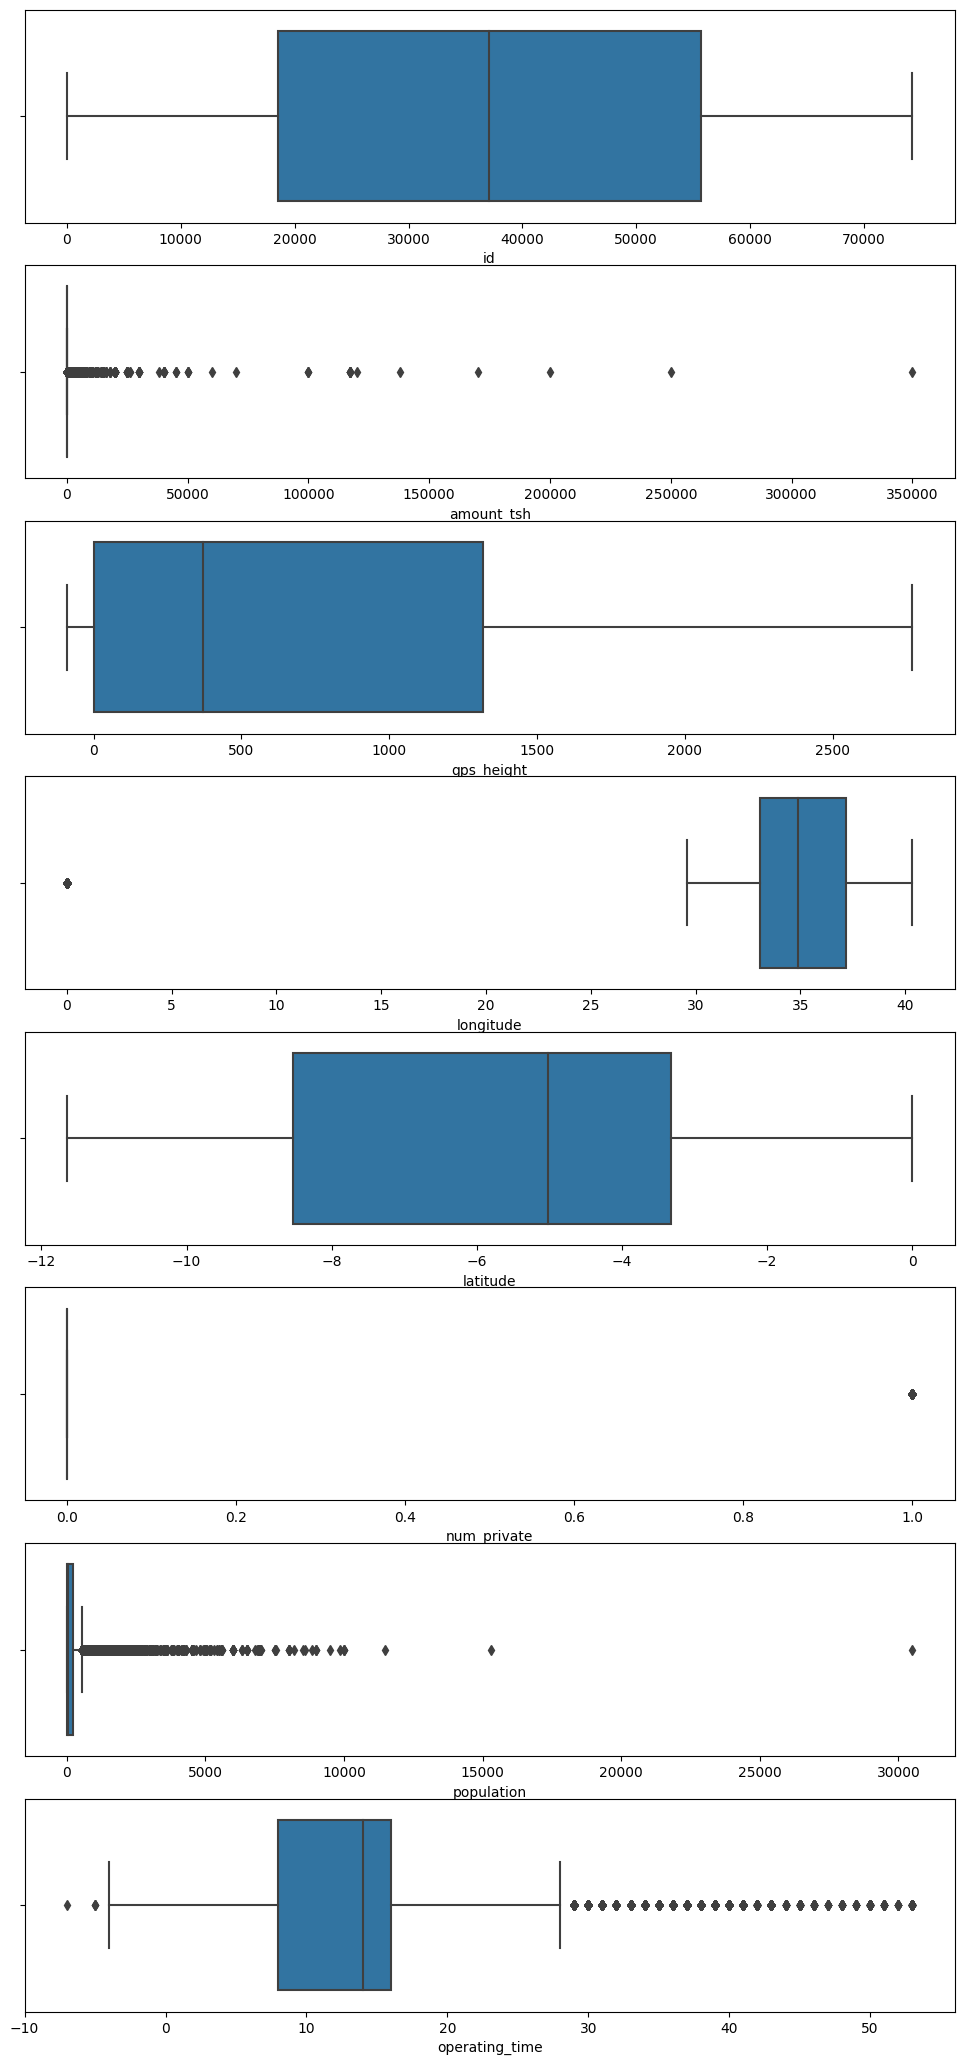

In [148]:
plt.figure(figsize=(12,26))
num_cols = df_pumps.select_dtypes("float").columns
for i in range(len(num_cols)) :
  plt.subplot(len(num_cols),1,i+1)
  sns.boxplot(data=df_pumps,x=num_cols[i])

In [136]:
df_pumps["construction_year"].value_counts()

0.0       20709
2010.0     2645
2008.0     2613
2009.0     2533
2000.0     2091
2007.0     1587
2006.0     1471
2003.0     1286
2011.0     1256
2004.0     1123
2012.0     1084
2002.0     1075
1978.0     1037
1995.0     1014
2005.0     1011
1999.0      979
1998.0      966
1990.0      954
1985.0      945
1980.0      811
1996.0      811
1984.0      779
1982.0      744
1994.0      738
1972.0      708
1974.0      676
1997.0      644
1992.0      640
1993.0      608
2001.0      540
1988.0      521
1983.0      488
1975.0      437
1986.0      434
1976.0      414
1970.0      411
1991.0      324
1989.0      316
1987.0      302
1981.0      238
1977.0      202
1979.0      192
1973.0      184
2013.0      176
1971.0      145
1960.0      102
1967.0       88
1963.0       85
1968.0       77
1969.0       59
1964.0       40
1962.0       30
1961.0       21
1965.0       19
1966.0       17
Name: construction_year, dtype: int64

there is too much missing values for the "construction_year" feature but as it is important it will be keeped and missing values will be replaced by the average

In [137]:
mean_year =  df_pumps["construction_year"][df_pumps["construction_year"]!=0].mean().round(0)
df_pumps["construction_year"].replace(0,mean_year,inplace=True)

In [138]:
# create a feature for operating time
df_pumps["record_year"] = pd.to_datetime(df_pumps.date_recorded).dt.year
df_pumps["operating_time"] = df_pumps["record_year"] - df_pumps["construction_year"]
df_pumps.drop(columns=["date_recorded","record_year","construction_year"],inplace=True)

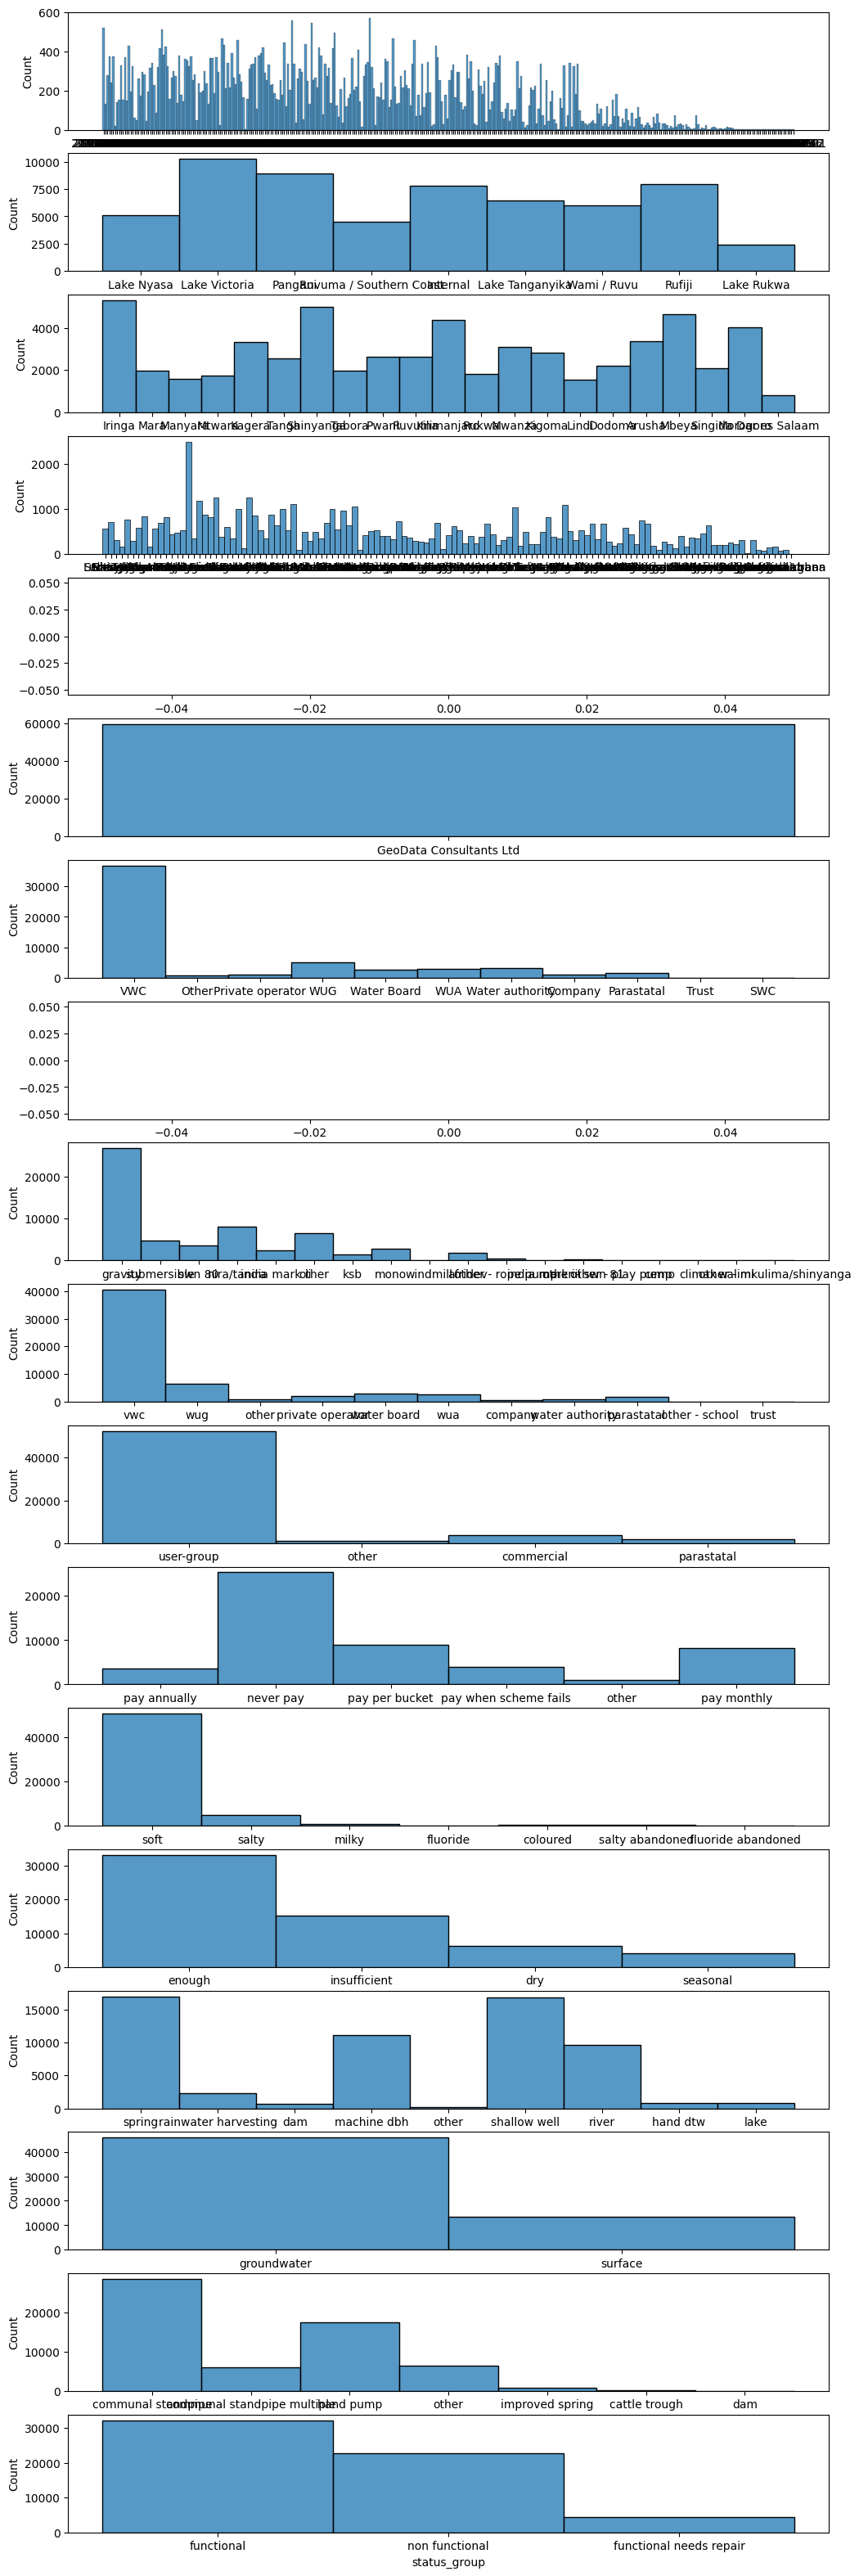

In [139]:
plt.figure(figsize=(12,40))
cat_list = df_pumps.select_dtypes("object").columns
for i in range(len(cat_list)) :
  try :
    plt.subplot(len(cat_list),1,i+1)
    sns.histplot(data=df_pumps,x=cat_list[i])
  except :
    pass

In [140]:
X = df_pumps.drop(columns="status_group")
y= df_pumps["status_group"]

In [141]:
# train test split data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [142]:
# create an imputer for missing values
cat_imputer = SimpleImputer(strategy="most_frequent")

In [143]:
# address missing values
cat_list = cat_list.delete(-1)
cat_imputer.fit(X[cat_list])
df_pumps[cat_list] = cat_imputer.transform(df_pumps[cat_list])